In [1]:
#INFORMATIONEN ZUM DATENSATZ - DIABETES PREDICTION  

# Quelle: Umfangreiche Datenbank des US-amerikanischen National Institute of Diabetes and Digestive and Kidney Diseases (NIDDK)

# Umfang: Frauen pima-indigener Herkunft im Alter von 21 Jahren und älter, wohnhaft in Phoenix, Arizona

# Größe: 768 Beobachtungen, 8 numerische erklärende Variablen

# Zielvariable: Outcome – Information darüber, ob eine Person an Diabetes erkrankt ist. Erkrankung vorhanden (1) oder nicht (0)

# Pregnancies: Anzahl der Schwangerschaften
# Glucose: Blutzuckerspiegel
# BloodPressure: Blutdruck (diastolisch)
# SkinThickness: Hautfaltendicke
# Insulin: Serum-Insulinspiegel
# BMI: Körpermasseindex (BMI)
# DiabetesPedigreeFunction: Stammbaumfunktion basierend auf familiärer Diabetesgeschichte
# Age: Alter (in Jahren)
# Outcome: Diabetesstatus (Zielvariable)


In [2]:
#DATAENVORBEREITUNG

In [3]:
#Erforderliche Bibliotheken importieren
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#!pip install missingno
import missingno as msno
from datetime import date
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import MinMaxScaler 
from sklearn.preprocessing import LabelEncoder 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.width', 500)

In [4]:
#Datensatz laden und erste Einblicke erhalten
diabetes = pd.read_csv("C:/Users/nesri/Downloads/diabetes.csv")
df= diabetes.copy()
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.600,0.627,50,1
1,1,85,66,29,0,26.600,0.351,31,0
2,8,183,64,0,0,23.300,0.672,32,1
3,1,89,66,23,94,28.100,0.167,21,0
4,0,137,40,35,168,43.100,2.288,33,1


In [5]:
#Allgemeine Informationen zum Datensatz
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df.duplicated().sum()

0

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.000,3.845,3.370,0.000,1.000,3.000,6.000,17.000
Glucose,768.000,120.895,31.973,0.000,99.000,117.000,140.250,199.000
BloodPressure,768.000,69.105,19.356,0.000,62.000,72.000,80.000,122.000
SkinThickness,768.000,20.536,15.952,0.000,0.000,23.000,32.000,99.000
Insulin,768.000,79.799,115.244,0.000,0.000,30.500,127.250,846.000
BMI,768.000,31.993,7.884,0.000,27.300,32.000,36.600,67.100
DiabetesPedigreeFunction,768.000,0.472,0.331,0.078,0.244,0.372,0.626,2.420
Age,768.000,33.241,11.760,21.000,24.000,29.000,41.000,81.000
Outcome,768.000,0.349,0.477,0.000,0.000,0.000,1.000,1.000


In [8]:
#Analyse von kategorialen und numerischen Variablen

def grab_col_names(dataframe, cat_th=10, car_th=20):
    cat_cols = [col for col in dataframe.columns if str(dataframe[col].dtypes) in ["category","object","bool"]]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and dataframe[col].dtypes in ["uint8","int64","float64"]]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and str(dataframe[col].dtypes) in ["category","object"]]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes in ["uint8","int64","float64"]]
    num_cols = [col for col in num_cols if col not in cat_cols]

    return cat_cols, num_cols, cat_but_car, num_but_cat

cat_cols, num_cols, cat_but_car, num_but_cat = grab_col_names(df)

print(f"Observations: {df.shape[0]}")
print(f"Variables: {df.shape[1]}")
print(f"cat_cols: {len(cat_cols)}")
print(f"num_cols: {len(num_cols)}")
print(f"cat_but_car: {len(cat_but_car)}")
print(f"num_but_cat: {len(  num_but_cat)}")

Observations: 768
Variables: 9
cat_cols: 1
num_cols: 8
cat_but_car: 0
num_but_cat: 1


In [9]:
# Verteilung der Zielvariable
def target_summary_with_cat(dataframe, target, categorical_col):
    print(categorical_col)
    print(pd.DataFrame({"TARGET_MEAN": dataframe.groupby(categorical_col)[target].mean().sort_values(ascending=False),
                        "COUNT": dataframe[categorical_col].value_counts(),
                        "RATIO": 100 * dataframe[categorical_col].value_counts() / len(dataframe)}), end="\n\n\n")

for col in cat_cols:
    target_summary_with_cat(df, "Outcome", col)

Outcome
         TARGET_MEAN  COUNT  RATIO
Outcome                           
0              0.000    500 65.104
1              1.000    268 34.896




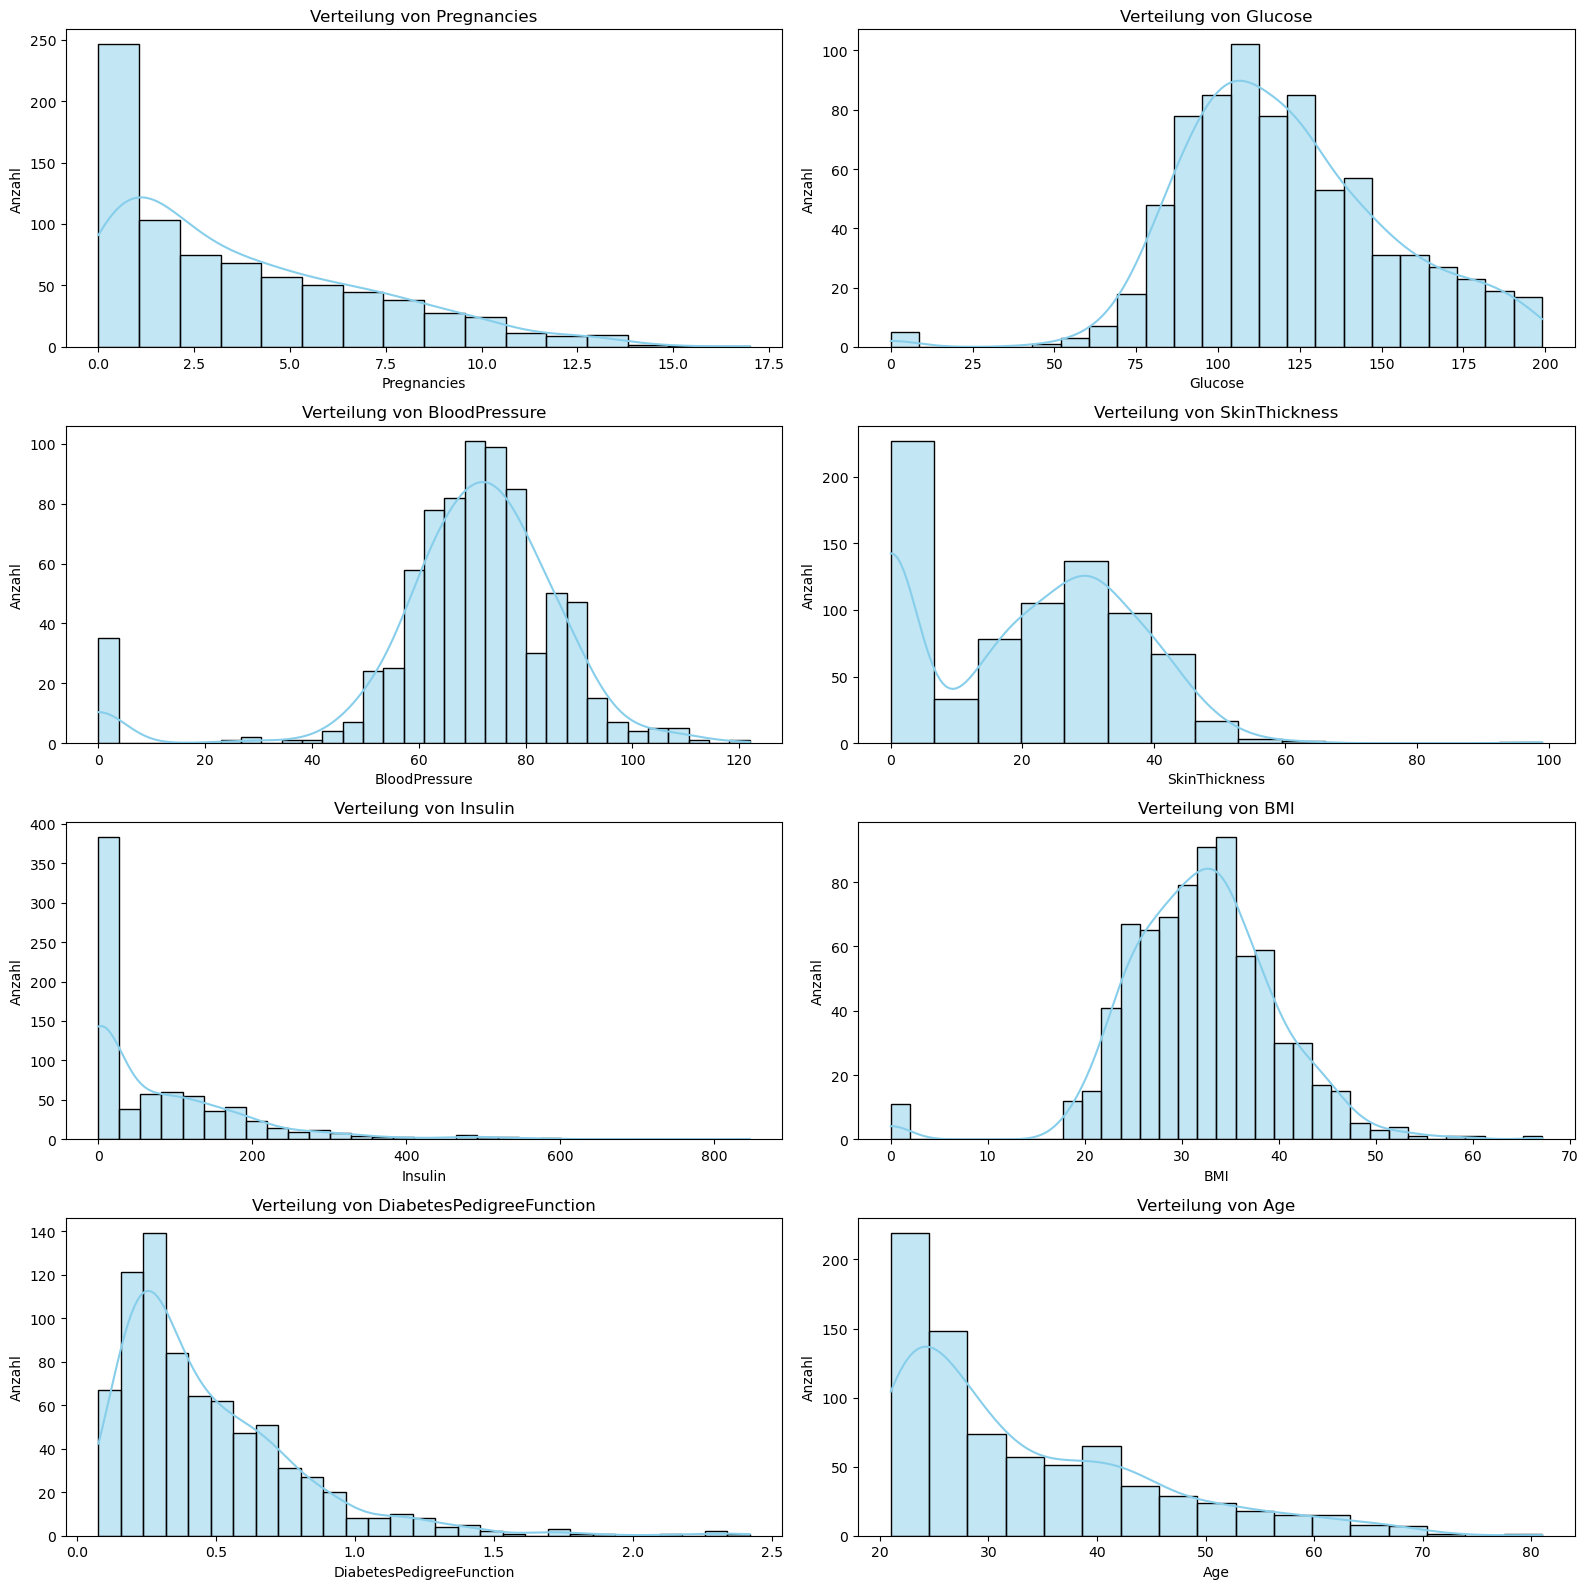

In [10]:
#Numerische Variablen visualisieren
fig, axes = plt.subplots(4, 2, figsize=(16, 16)) 

axes = axes.flatten()  

for i, col in enumerate(num_cols):
    sns.histplot(df[col], kde=True, color='skyblue', ax=axes[i])
    axes[i].set_title(f"Verteilung von {col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Anzahl")

plt.tight_layout()
plt.show()

In [11]:
# In einer Person können die Werte der Variablen außer Pregnancies und Outcome nicht 0 sein.
# Deshalb sollten wir für diese Spalten bei 0-Werten eine Entscheidung treffen.
# Spalten auswählen, bei denen 0 nicht erlaubt ist (außer Pregnancies, Outcome und Age)

zero_columns = [col for col in df.columns if (df[col].min() == 0 and col not in ["Pregnancies", "Outcome", "Age"])]

# 1. Ersetze 0-Werte durch NaN
for col in zero_columns:
    df[col] = df[col].replace(0, np.nan)

# Anzahl der fehlenden Werte anzeigen
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [12]:
def missing_values_table(dataframe, na_name=False):

    na_columns = [col for col in dataframe.columns if dataframe[col].isnull().sum() > 0]
    n_miss = dataframe[na_columns].isnull().sum().sort_values(ascending=False)
    ratio = (100 * dataframe[na_columns].isnull().sum() / len(dataframe)).sort_values(ascending=False)
    missing_df = pd.concat([n_miss, np.round(ratio, 2)], axis=1, keys=["n_miss", "ratio"])
    print(missing_df, end="\n\n")

    if na_name:
        return na_columns
na_columns = missing_values_table(df, True)

               n_miss  ratio
Insulin           374 48.700
SkinThickness     227 29.560
BloodPressure      35  4.560
BMI                11  1.430
Glucose             5  0.650



<Axes: >

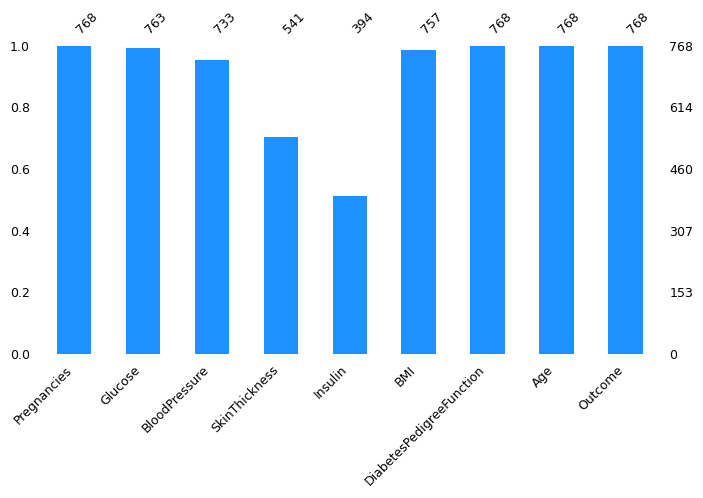

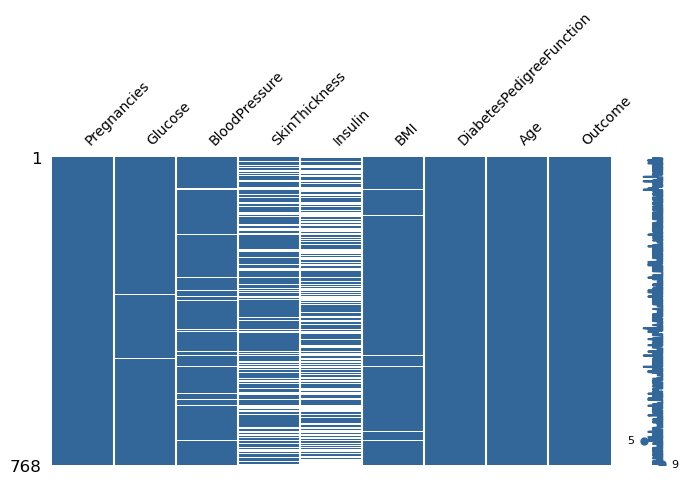

In [13]:
# missing_values
msno.bar(df, fontsize=9, figsize=(8,4), color='dodgerblue') 
msno.matrix(df, fontsize=10, figsize=(8, 4), color=(0.2, 0.4, 0.6))  

In [14]:
#Gruppierte statistische Übersicht nach Outcome (Mittelwert & Median)
num_cols = df.select_dtypes(include='number').columns.drop("Outcome")

agg_dict_both = {col: ["mean", "median"] for col in num_cols}
df.groupby("Outcome").agg(agg_dict_both)

Pregnancies        Glucose         BloodPressure        SkinThickness        Insulin            BMI        DiabetesPedigreeFunction           Age       
               mean median    mean  median          mean median          mean median    mean  median   mean median                     mean median   mean median
Outcome                                                                                                                                                         
0             3.298  2.000 110.644 107.000        70.877 70.000        27.235 27.000 130.288 102.500 30.860 30.100                    0.430  0.336 31.190 27.000
1             4.866  4.000 142.320 140.000        75.321 74.500        33.000 32.000 206.846 169.500 35.407 34.300                    0.550  0.449 37.067 36.000

In [15]:
# Fehlende Werte auffüllen

# Für Patienten ohne Diabetes (Outcome == 0) wird der Median der jeweiligen Spalte aus dieser Gruppe verwendet.
# Für Patienten mit Diabetes (Outcome == 1) wird entsprechend der Mean aus dieser Gruppe genutzt.
for col in zero_columns:
    mean_0 = df.loc[df["Outcome"] == 0, col].mean()
    mean_1 = df.loc[df["Outcome"] == 1, col].mean()
    
    df.loc[(df["Outcome"] == 0) & (df[col].isnull()), col] = mean_0
    df.loc[(df["Outcome"] == 1) & (df[col].isnull()), col] = mean_1

# Fehlende Werte anzeigen
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [16]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.000,3.845,3.370,0.000,1.000,3.000,6.000,17.000
Glucose,768.000,121.697,30.462,44.000,99.750,117.000,141.000,199.000
BloodPressure,768.000,72.428,12.106,24.000,64.000,72.000,80.000,122.000
SkinThickness,768.000,29.247,8.924,7.000,25.000,28.000,33.000,99.000
Insulin,768.000,157.004,88.861,14.000,121.500,130.288,206.846,846.000
BMI,768.000,32.446,6.879,18.200,27.500,32.050,36.600,67.100
DiabetesPedigreeFunction,768.000,0.472,0.331,0.078,0.244,0.372,0.626,2.420
Age,768.000,33.241,11.760,21.000,24.000,29.000,41.000,81.000
Outcome,768.000,0.349,0.477,0.000,0.000,0.000,1.000,1.000


In [17]:
# Ausreißer-Werte 
# Ausreißer-Werte pro numerischer Spalte
for col in df.select_dtypes(include='number').columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower) | (df[col] > upper)][col]

    if not outliers.empty:
        print(f"#Ausreißer in der Spalte {col}:")
        print(f"Anzahl der Ausreißer: {len(outliers)}")
        print(f"Werte: {outliers.tolist()}\n")
    else:
        print(f"#Keine Ausreißer in der Spalte '{col}'.\n")

#Ausreißer in der Spalte Pregnancies:
Anzahl der Ausreißer: 4
Werte: [15, 17, 14, 14]

#Keine Ausreißer in der Spalte 'Glucose'.

#Ausreißer in der Spalte BloodPressure:
Anzahl der Ausreißer: 14
Werte: [30.0, 110.0, 108.0, 122.0, 30.0, 110.0, 108.0, 110.0, 24.0, 38.0, 106.0, 106.0, 106.0, 114.0]

#Ausreißer in der Spalte SkinThickness:
Anzahl der Ausreißer: 53
Werte: [47.0, 11.0, 47.0, 11.0, 10.0, 60.0, 54.0, 51.0, 56.0, 50.0, 12.0, 46.0, 54.0, 7.0, 50.0, 52.0, 10.0, 10.0, 11.0, 12.0, 12.0, 48.0, 8.0, 12.0, 49.0, 46.0, 46.0, 11.0, 8.0, 12.0, 63.0, 12.0, 48.0, 10.0, 7.0, 52.0, 49.0, 47.0, 99.0, 46.0, 11.0, 50.0, 47.0, 12.0, 48.0, 46.0, 46.0, 10.0, 46.0, 49.0, 11.0, 46.0, 48.0]

#Ausreißer in der Spalte Insulin:
Anzahl der Ausreißer: 27
Werte: [543.0, 846.0, 342.0, 495.0, 485.0, 495.0, 478.0, 744.0, 370.0, 680.0, 402.0, 375.0, 545.0, 360.0, 465.0, 415.0, 579.0, 474.0, 480.0, 600.0, 440.0, 540.0, 480.0, 335.0, 387.0, 392.0, 510.0]

#Ausreißer in der Spalte BMI:
Anzahl der Ausreißer: 8
Wer

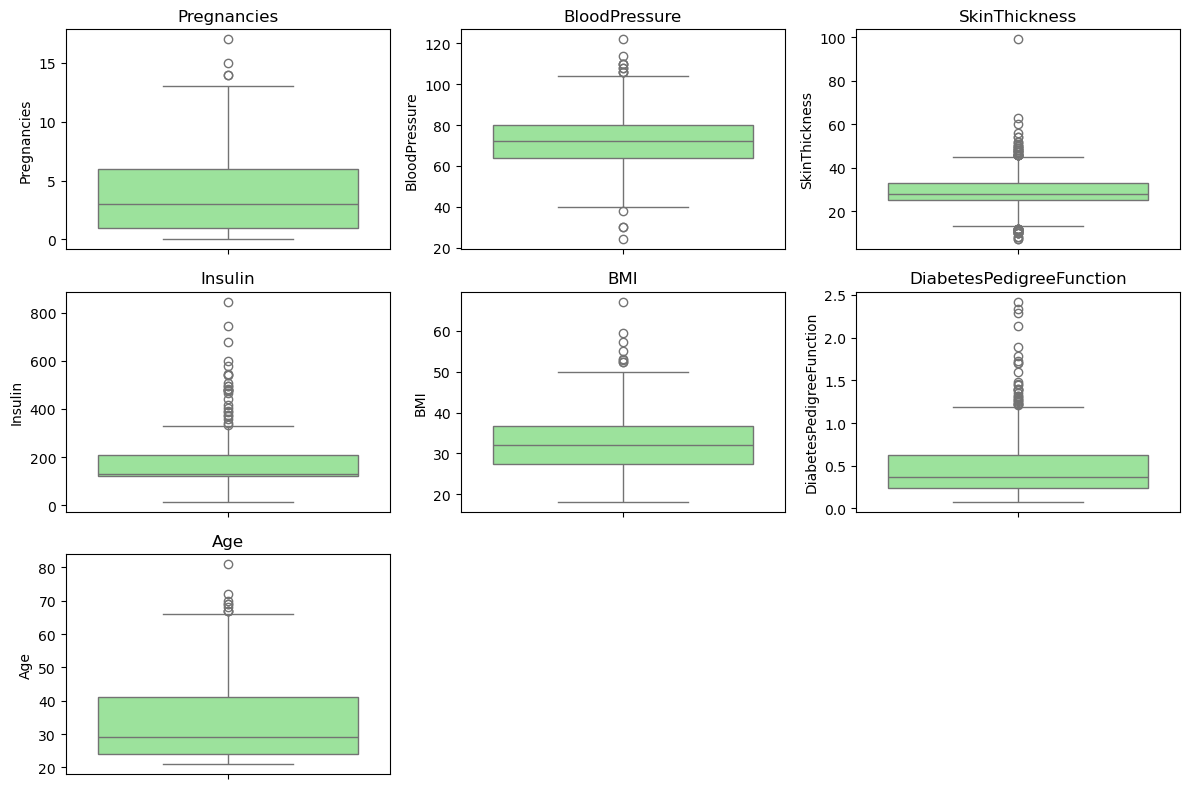

In [18]:
cols =['Pregnancies', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

plt.figure(figsize=(12, 8))
for i, col in enumerate(cols, 1):
    plt.subplot(3, 3, i)  
    sns.boxplot(y=df[col], color='lightgreen')
    plt.title(col)

plt.tight_layout()
plt.show()

In [19]:
# Ausreißer-Behandlung (Re-Assignment mit IQR-Schwellenwerten)
def outlier_thresholds(df, col_name, q1=0.25, q3=0.75):
    Q1 = df[col_name].quantile(q1)
    Q3 = df[col_name].quantile(q3)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return lower, upper

def replace_with_thresholds(df, variable):

    df[variable] = df[variable].astype(float)

    lower, upper = outlier_thresholds(df, variable)
    df.loc[df[variable] < lower, variable] = lower
    df.loc[df[variable] > upper, variable] = upper


cols = ['Pregnancies', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction']


for col in cols:
    replace_with_thresholds(df, col)

In [20]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.000,3.837,3.344,0.000,1.000,3.000,6.000,13.500
Glucose,768.000,121.697,30.462,44.000,99.750,117.000,141.000,199.000
BloodPressure,768.000,72.399,11.707,40.000,64.000,72.000,80.000,104.000
SkinThickness,768.000,29.071,7.989,13.000,25.000,28.000,33.000,45.000
Insulin,768.000,151.514,67.470,14.000,121.500,130.288,206.846,334.865
BMI,768.000,32.385,6.671,18.200,27.500,32.050,36.600,50.250
DiabetesPedigreeFunction,768.000,0.459,0.286,0.078,0.244,0.372,0.626,1.200
Age,768.000,33.241,11.760,21.000,24.000,29.000,41.000,81.000
Outcome,768.000,0.349,0.477,0.000,0.000,0.000,1.000,1.000


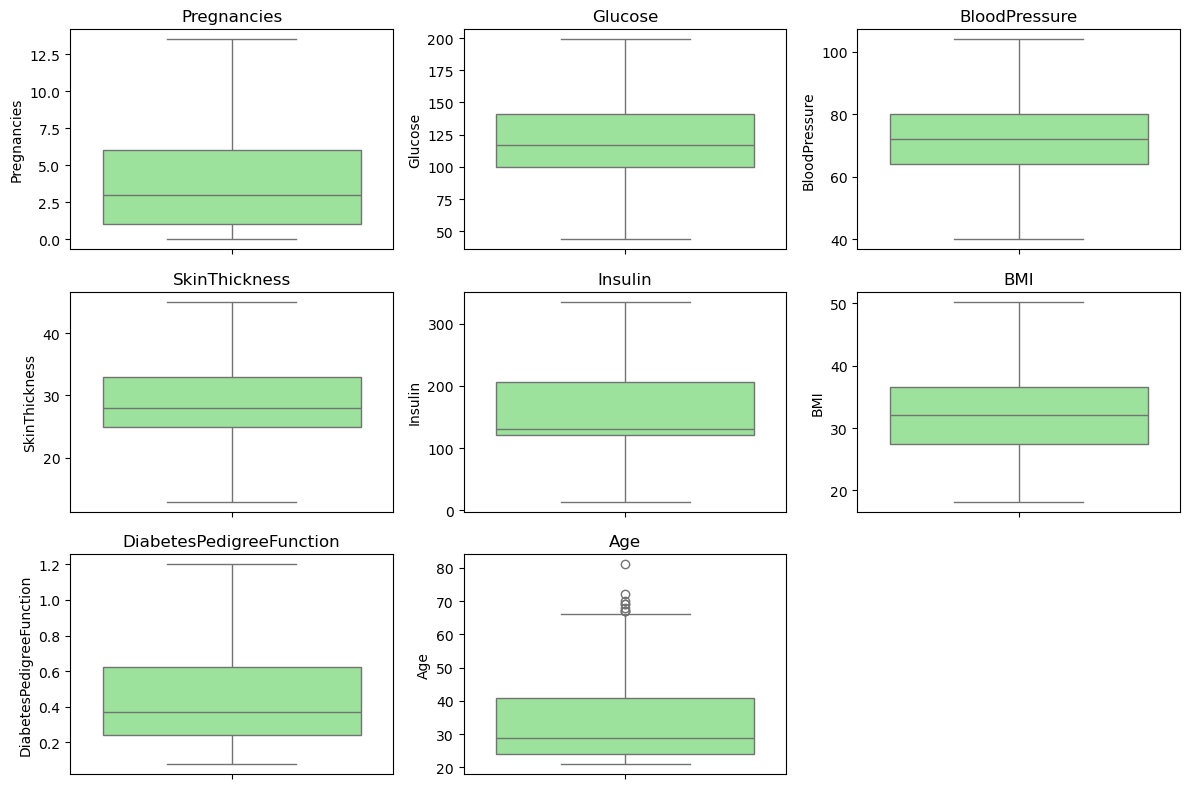

In [21]:
cols =['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

plt.figure(figsize=(12, 8))
for i, col in enumerate(cols, 1):
    plt.subplot(3, 3, i)  # 3 satır, 3 sütun
    sns.boxplot(y=df[col], color='lightgreen')
    plt.title(col)

plt.tight_layout()
plt.show()

In [22]:
#Local Outlier Factor (LOF)

# Mehrdimensionale Ausreißer-Erkennung mit Local Outlier Factor (LOF)
from sklearn.neighbors import LocalOutlierFactor

# LOF-Modell erstellen mit 20 Nachbarn und 10% erwarteten Ausreißern
clf = LocalOutlierFactor(n_neighbors=20, contamination=0.1)

# LOF-Modell auf den Daten anwenden
clf.fit_predict(df)

# Die negativen Ausreißerfaktoren (je kleiner, desto mehr Ausreißer)
df_scores = clf.negative_outlier_factor_

# Erste 10 Scores anzeigen
df_scores[0:10]

array([-1.01973896, -0.98289371, -1.0574313 , -0.99145564, -1.30526818,
       -1.01148069, -1.10086042, -1.00993105, -1.11454936, -1.19966183])

In [23]:
# df_scores 
sorted_scores=np.sort(df_scores)
sorted_scores[0:10]

array([-2.28249623, -2.24002388, -1.80964006, -1.76251919, -1.69320004,
       -1.68343223, -1.67663767, -1.65337569, -1.63499466, -1.57883845])

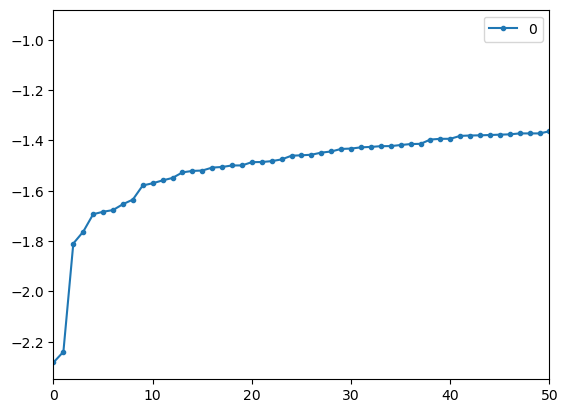

In [24]:
scores=pd.DataFrame(np.sort(df_scores))
scores.plot(stacked=True, xlim=(0, 50), style='.-')
plt.show()

In [25]:
# Schwellenwert festlegen (z. B. der 5.-kleinste Wert)
th = np.sort(df_scores)[5]

# Zeilen anzeigen, deren Score unterhalb des Schwellenwertes liegt
df[df_scores < th]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
254,12.000,92.000,62.000,13.000,258.000,27.600,0.926,44,1
445,0.000,180.000,78.000,45.000,14.000,50.250,1.200,25,1
459,9.000,134.000,74.000,33.000,60.000,25.900,0.460,81,0
537,0.000,57.000,60.000,27.235,130.288,21.700,0.735,67,0
679,2.000,101.000,58.000,17.000,265.000,24.200,0.614,23,0


In [26]:
df.describe([0.01, 0.05, 0.75, 0.90, 0.99]).T

,count,mean,std,min,1%,5%,50%,75%,90%,99%,max
Pregnancies,768.000,3.837,3.344,0.000,0.000,0.000,3.000,6.000,9.000,13.000,13.500
Glucose,768.000,121.697,30.462,44.000,67.670,80.000,117.000,141.000,167.000,196.000,199.000
BloodPressure,768.000,72.399,11.707,40.000,44.000,52.000,72.000,80.000,88.000,104.000,104.000
SkinThickness,768.000,29.071,7.989,13.000,13.000,14.350,28.000,33.000,40.000,45.000,45.000
Insulin,768.000,151.514,67.470,14.000,24.340,50.000,130.288,206.846,210.000,334.865,334.865
BMI,768.000,32.385,6.671,18.200,19.500,22.235,32.050,36.600,41.500,50.083,50.250
DiabetesPedigreeFunction,768.000,0.459,0.286,0.078,0.095,0.140,0.372,0.626,0.879,1.200,1.200
Age,768.000,33.241,11.760,21.000,21.000,21.000,29.000,41.000,51.000,67.000,81.000
Outcome,768.000,0.349,0.477,0.000,0.000,0.000,0.000,1.000,1.000,1.000,1.000


In [27]:
#Zur Modellbewertung wurden nur die Beobachtungen mit einem Score größer oder gleich dem Schwellenwert th berücksichtigt.
df_neu = df[df_scores >= th]

In [28]:
df_neu.shape

(763, 9)

In [29]:
df_neu.describe([0.01, 0.05, 0.75, 0.90, 0.99]).T

,count,mean,std,min,1%,5%,50%,75%,90%,99%,max
Pregnancies,763.000,3.832,3.330,0.000,0.000,0.000,3.000,6.000,9.000,13.000,13.500
Glucose,763.000,121.756,30.367,44.000,68.000,80.000,117.000,141.000,167.000,196.000,199.000
BloodPressure,763.000,72.439,11.717,40.000,44.000,52.000,72.000,80.000,88.000,104.000,104.000
SkinThickness,763.000,29.085,7.960,13.000,13.000,15.000,28.000,33.000,40.000,45.000,45.000
Insulin,763.000,151.554,67.186,15.000,27.480,50.100,130.288,206.846,210.000,334.865,334.865
BMI,763.000,32.401,6.637,18.200,19.500,22.310,32.200,36.600,41.460,49.814,50.250
DiabetesPedigreeFunction,763.000,0.457,0.285,0.078,0.094,0.140,0.370,0.621,0.875,1.200,1.200
Age,763.000,33.144,11.590,21.000,21.000,21.000,29.000,40.500,51.000,66.000,72.000
Outcome,763.000,0.349,0.477,0.000,0.000,0.000,0.000,1.000,1.000,1.000,1.000


In [30]:
#Korrelationskoeffizienten zwischen numerischen Merkmalen
df[num_cols].corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Pregnancies,1.000,0.129,0.211,0.117,0.144,0.030,-0.017,0.546
Glucose,0.129,1.000,0.226,0.229,0.533,0.238,0.119,0.269
BloodPressure,0.211,0.226,1.000,0.219,0.135,0.292,0.013,0.330
SkinThickness,0.117,0.229,0.219,1.000,0.268,0.584,0.077,0.133
Insulin,0.144,0.533,0.135,0.268,1.000,0.268,0.106,0.198
BMI,0.030,0.238,0.292,0.584,0.268,1.000,0.138,0.034
DiabetesPedigreeFunction,-0.017,0.119,0.013,0.077,0.106,0.138,1.000,0.047
Age,0.546,0.269,0.330,0.133,0.198,0.034,0.047,1.000


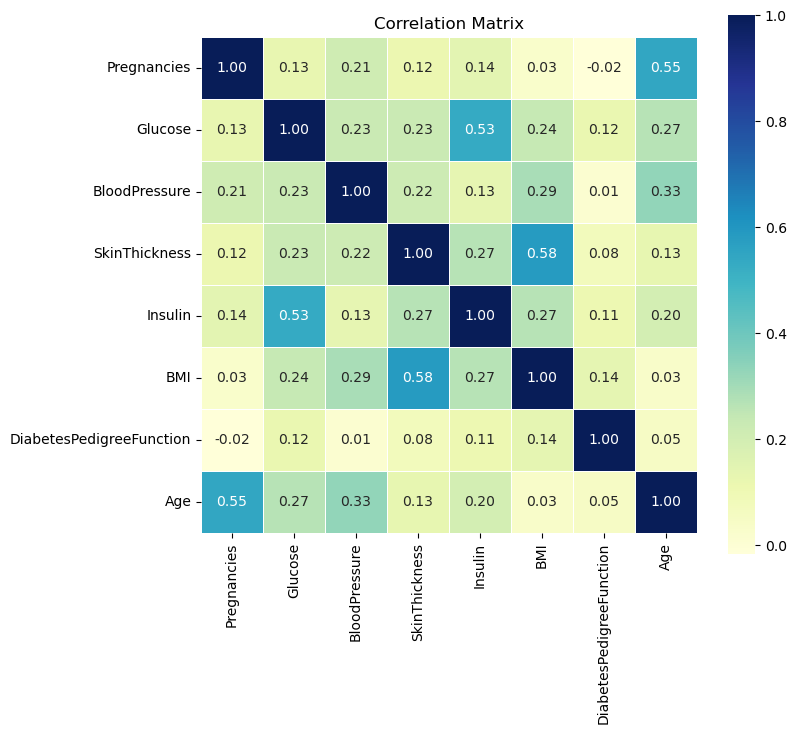

In [31]:
# Korrelationsmatrix als Heatmap darstellen 
plt.figure(figsize=(8, 7))
sns.heatmap(df[num_cols].corr(), annot=True, fmt=".2f", cmap="YlGnBu", square=True, linewidths=0.7)
plt.title("Correlation Matrix", fontsize=12)
plt.show()

In [32]:
# NEUE MERKMALE ERSTELLEN

In [33]:
#Erstellung der Altersgruppen-Kategorie (AgeGroup)
df["AgeGroup"] = pd.cut(df["Age"], bins=[20, 30, 40, 50, 60, 100], labels=["20s", "30s", "40s", "50s", "60+"])
df["AgeGroup"].value_counts()

AgeGroup
20s    417
30s    157
40s    113
50s     54
60+     27
Name: count, dtype: int64

In [34]:
df.groupby("AgeGroup", observed=True)["Outcome"]\
                .value_counts(normalize=True)\
                .mul(100)\
                .rename("OutcomeRate")\
                .reset_index()

,AgeGroup,Outcome,OutcomeRate
0,20s,0,78.417
1,20s,1,21.583
2,30s,0,51.592
3,30s,1,48.408
4,40s,1,56.637
5,40s,0,43.363
6,50s,1,57.407
7,50s,0,42.593
8,60+,0,74.074
9,60+,1,25.926


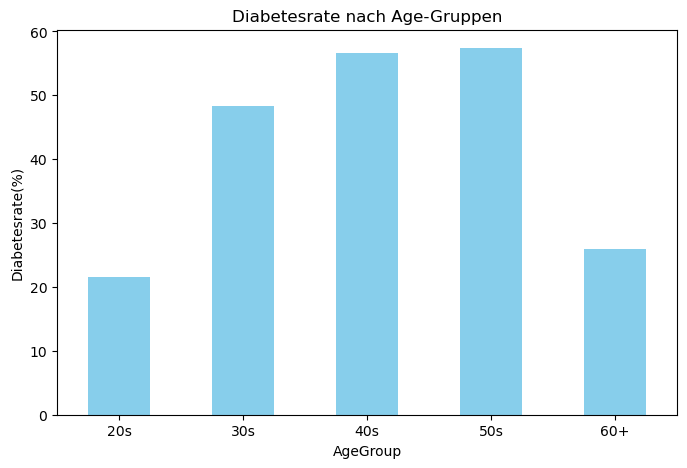

In [35]:
Outcome_by_AgeGroup = df.groupby("AgeGroup", observed=True)["Outcome"].mean() * 100

Outcome_by_AgeGroup.plot(
    kind="bar",
    legend=False,
    ylabel="Diabetesrate(%)",
    title="Diabetesrate nach Age-Gruppen",
    figsize=(8, 5),
    color="skyblue"
)

plt.xticks(rotation=0)
plt.show()

In [36]:
#In jungen Jahren (20er) ist der Anteil an Diabetes relativ gering (21 %).
#Ab dem 30. Lebensjahr beginnt der Anteil der an Diabetes erkrankten Personen deutlich zu steigen.
#In den 40er- und 50er-Jahren gibt es mehr Menschen mit Diabetes als ohne.
#In der Altersgruppe 60+ sinkt der Anteil an Diabetes wieder.

In [37]:
#Erstellung der BMI-Kategorie (BMICategory)
def BMI_category(bmi):
    if bmi < 18.5:
        return "Underweight"
    elif bmi < 25:
        return "Normal"
    elif bmi < 30:
        return "Overweight"
    else:
        return "Obese"

df["BMICategory"] = df["BMI"].apply(BMI_category)
bmi_categories_order = ["Underweight", "Normal", "Overweight", "Obese"]

df["BMICategory"] = pd.Categorical(df["BMICategory"], categories=bmi_categories_order, ordered=True)
df["BMICategory"].value_counts()

BMICategory
Obese          483
Overweight     179
Normal         102
Underweight      4
Name: count, dtype: int64

In [38]:
df.groupby("BMICategory", observed=True)["Outcome"]\
                .value_counts(normalize=True)\
                .mul(100)\
                .reset_index()

,BMICategory,Outcome,proportion
0,Underweight,0,100.000
1,Normal,0,93.137
2,Normal,1,6.863
3,Overweight,0,77.654
4,Overweight,1,22.346
5,Obese,0,54.244
6,Obese,1,45.756


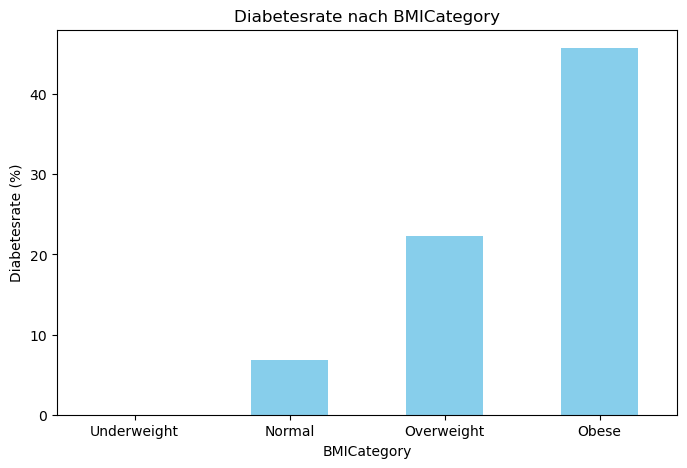

In [39]:
Outcome_by_BMICategory = df.groupby("BMICategory", observed=True)["Outcome"].mean() * 100

Outcome_by_BMICategory.plot(
    kind="bar",
    legend=False,
    ylabel="Diabetesrate (%)",
    title="Diabetesrate nach BMICategory",
    figsize=(8, 5),
    color="skyblue"
)
plt.xticks(rotation=0)
plt.show()

In [40]:
#Bei fettleibigen Personen ist die Diabetesrate relativ hoch (~46 %).In den Gruppen Normalgewicht und Untergewicht ist die Diabetesrate sehr niedrig.
#In der Gruppe Untergewicht gibt es keine Personen mit Diabetes. Bei übergewichtigen Personen liegt die Diabetesrate bei etwa 22 %.

In [41]:
def glucose_category(glucose):
    if glucose < 100:
        return "normal"
    elif glucose < 126:
        return "prediabetes"
    else:
        return "diabetes"

df["GlucoseCategory"] = df["Glucose"].apply(glucose_category)

glucose_order = ["normal", "prediabetes", "diabetes"]  
df["GlucoseCategory"] = pd.Categorical(df["GlucoseCategory"], categories=glucose_order, ordered=True)
df["GlucoseCategory"].value_counts()

GlucoseCategory
diabetes       299
prediabetes    277
normal         192
Name: count, dtype: int64

In [42]:
df.groupby("GlucoseCategory", observed=True)["Outcome"]\
           .value_counts(normalize=True)\
           .mul(100)\
           .rename("OutcomeRate")\
           .reset_index()

,GlucoseCategory,Outcome,OutcomeRate
0,normal,0,92.708
1,normal,1,7.292
2,prediabetes,0,72.563
3,prediabetes,1,27.437
4,diabetes,1,59.532
5,diabetes,0,40.468


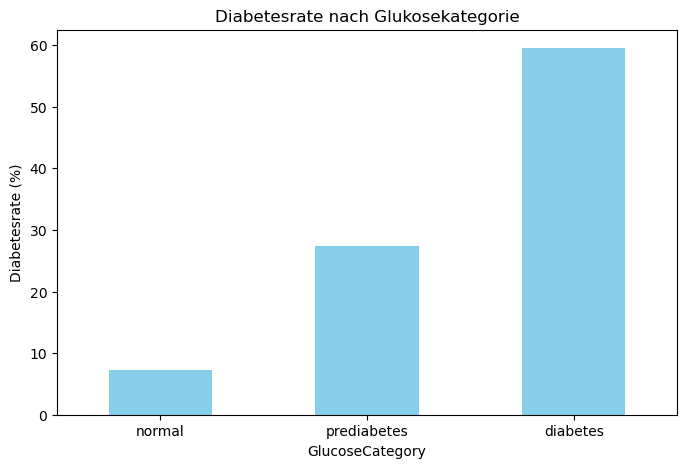

In [43]:
Outcome_by_GlucoseCategory = df.groupby("GlucoseCategory", observed=True)["Outcome"].mean() * 100

Outcome_by_GlucoseCategory.plot(
    kind="bar",
    legend=False,
    ylabel="Diabetesrate (%)",
    title="Diabetesrate nach Glukosekategorie",
    figsize=(8, 5),
    color="skyblue"
)

plt.xticks(rotation=0)
plt.show()


In [44]:
#Mit steigendem Glukosespiegel nimmt die Diabetesrate deutlich zu.
#In der normalen Kategorie liegt die Rate bei nur 7 %, in der Prädiabetes-Kategorie steigt sie auf 27 % und in der Diabetes-Kategorie erreicht sie 60 %.
#Dies zeigt, dass der Glukosewert ein starker Prädiktor für das Diabetesrisiko ist.

In [46]:
#Erstellung der Schwangerschaft-Kategorie (PregnancyCategory)
def pregnancies_category(n):
    if n == 0:
        return "unpregnant"
    elif n <= 5:
        return "normal"
    elif n <= 10:
        return "high"
    else:
        return "very high"

df["PregnancyCategory"] = df["Pregnancies"].apply(pregnancies_category)
pregnancies_order = ["unpregnant", "normal", "high", "very high"]
df["PregnancyCategory"] = pd.Categorical(df["PregnancyCategory"], categories=pregnancies_order, ordered=True)
df["PregnancyCategory"].value_counts()

PregnancyCategory
normal        438
high          185
unpregnant    111
very high      34
Name: count, dtype: int64

In [47]:
df.groupby("PregnancyCategory", observed=True)["Outcome"]\
           .value_counts(normalize=True)\
           .mul(100)\
           .rename("OutcomeRate")\
           .reset_index()

,PregnancyCategory,Outcome,OutcomeRate
0,unpregnant,0,65.766
1,unpregnant,1,34.234
2,normal,0,72.831
3,normal,1,27.169
4,high,0,50.811
5,high,1,49.189
6,very high,1,58.824
7,very high,0,41.176


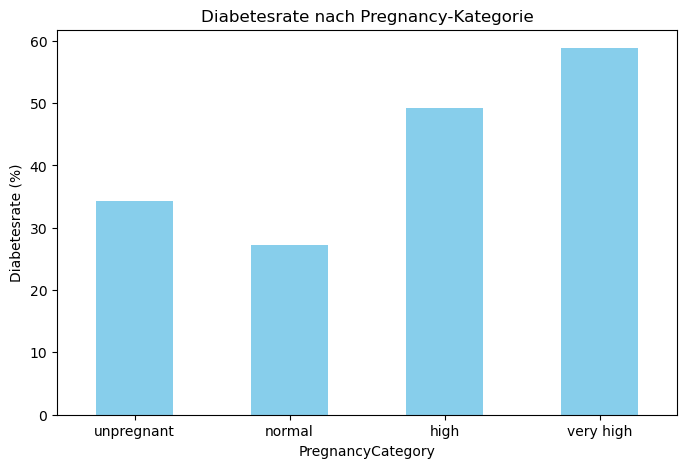

In [48]:
Outcome_by_PregnancyCategory = df.groupby("PregnancyCategory", observed=True)["Outcome"].mean() * 100

Outcome_by_PregnancyCategory.plot(
    kind="bar",
    legend=False,
    ylabel="Diabetesrate (%)",
    title="Diabetesrate nach Pregnancy-Kategorie",
    figsize=(8, 5),
    color="skyblue"
)

plt.xticks(rotation=0)
plt.show()

In [49]:
#Mit zunehmender Anzahl an Schwangerschaften steigt die Diabetesrate deutlich an.
#Mehrfache Schwangerschaften (sehr hoch) könnten ein starker Indikator für ein erhöhtes Diabetesrisiko sein.
#Dieses Ergebnis unterstützt die Annahme, dass die Anzahl der Schwangerschaften ein relevanter Risikofaktor für Diabetes ist.

In [50]:
#Erstellung der Insulin-Kategorie (InsulinCategory)
def insulin_category(insulin):
    if insulin == 0:
        return "unmeasured"
    elif insulin <= 16:
        return "low"
    elif insulin <= 166:
        return "normal"
    else:
        return "high"


df["InsulinCategory"] = df["Insulin"].apply(insulin_category)

insulin_order= ["unmeasured", "low", "normal", "high"]

df["InsulinCategory"] = pd.Categorical(df["InsulinCategory"], categories=insulin_order, ordered=True)
df["InsulinCategory"].value_counts()

InsulinCategory
normal        495
high          270
low             3
unmeasured      0
Name: count, dtype: int64

In [51]:
df.groupby("InsulinCategory", observed=True)["Outcome"]\
           .value_counts(normalize=True)\
           .mul(100)\
           .rename("OutcomeRate")\
           .reset_index()

,InsulinCategory,Outcome,OutcomeRate
0,low,0,66.667
1,low,1,33.333
2,normal,0,87.879
3,normal,1,12.121
4,high,1,76.667
5,high,0,23.333


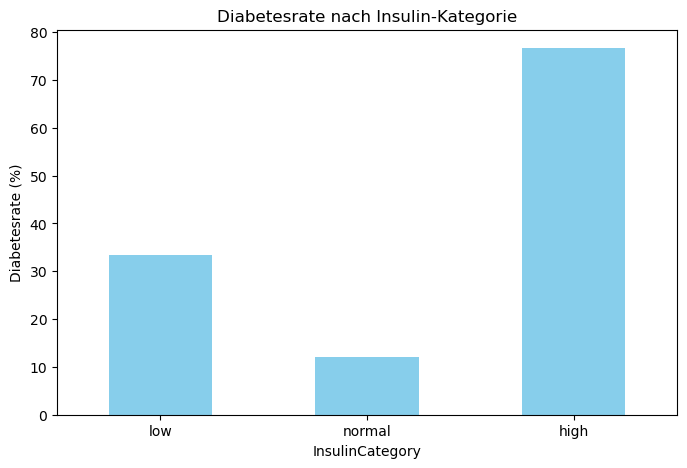

In [52]:
Outcome_by_InsulinCategory = df.groupby("InsulinCategory", observed=True)["Outcome"].mean() * 100

Outcome_by_InsulinCategory.plot(
    kind="bar",
    title="Diabetesrate nach Insulin-Kategorie",
    ylabel="Diabetesrate (%)",
    color="skyblue",
    figsize=(8, 5)
)

plt.xticks(rotation=0)
plt.show()


In [53]:
#Personen mit normalen Insulinwerten haben ein sehr geringes Diabetesrisiko.
#Ein hoher Insulinspiegel – also Hyperinsulinämie – kann ein deutliches Anzeichen für Diabetes sein.

In [54]:
#Erstellung der Blutdruck-Kategorie (BloodPressureCategory)
def bp_category(bp):
    if bp < 60:
        return "low"
    elif bp < 80:
        return "normal"
    elif bp < 90:
        return "high-normal"
    else:
        return "high"

df["BPCategory"] = df["BloodPressure"].apply(bp_category)


bp_order = ["low", "normal", "high-normal", "high"]
df["BPCategory"] = pd.Categorical(df["BPCategory"], categories=bp_order, ordered=True)
df["BPCategory"].value_counts()

BPCategory
normal         477
high-normal    145
low             86
high            60
Name: count, dtype: int64

In [55]:
df.groupby("BPCategory", observed=True)["Outcome"]\
           .value_counts(normalize=True)\
           .mul(100)\
           .rename("OutcomeRate")\
           .reset_index()

,BPCategory,Outcome,OutcomeRate
0,low,0,81.395
1,low,1,18.605
2,normal,0,66.038
3,normal,1,33.962
4,high-normal,0,57.931
5,high-normal,1,42.069
6,high,0,51.667
7,high,1,48.333


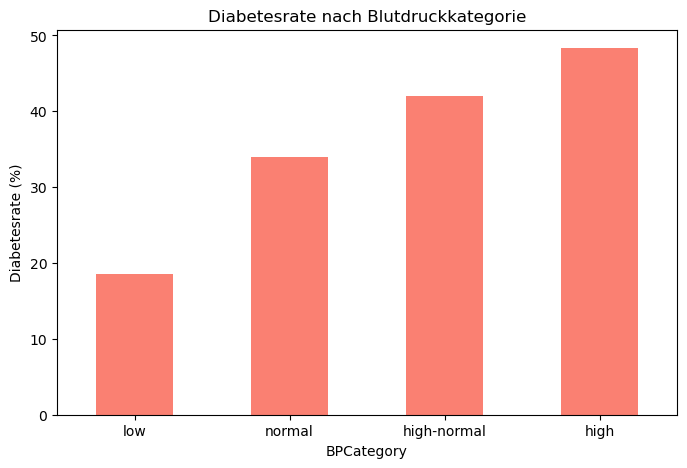

In [56]:
Outcome_by_BPCategory= df.groupby("BPCategory", observed=True)["Outcome"].mean() * 100


Outcome_by_BPCategory.plot(
    kind="bar",
    color="salmon",
    ylabel="Diabetesrate (%)",
    title="Diabetesrate nach Blutdruckkategorie",
    figsize=(8, 5),
    legend=False
)

plt.xticks(rotation=0)
plt.show()


In [57]:
#Mit steigendem Blutdruck nimmt die Diabetesrate deutlich zu.
#Insbesondere Personen in den Kategorien „hoch-normal“ und „hoch“ weisen ein deutlich höheres Diabetesrisiko auf.
#Diese Ergebnisse unterstützen eindrucksvoll, dass Bluthochdruck ein wichtiger Risikofaktor für Diabetes ist.

In [58]:
#Erstellung der Hautdicke-Kategorie (SkinThicknessCategory)
def skin_category(skin):
    if skin <= 10:
        return "thin"
    elif skin <= 20:
        return "medium"
    elif skin <= 30:
        return "thick"
    else:
        return "very thick"

df["SkinCategory"] = df["SkinThickness"].apply(skin_category)

skin_order = ["thin", "medium", "thick", "very thick"]
df["SkinCategory"] = pd.Categorical(df["SkinCategory"], categories=skin_order, ordered=True)

df["SkinCategory"].value_counts()

SkinCategory
very thick    326
thick         318
medium        124
thin            0
Name: count, dtype: int64

In [59]:
df.groupby("SkinCategory", observed=True)["Outcome"]\
           .value_counts(normalize=True)\
           .mul(100)\
           .rename("OutcomeRate")\
           .reset_index()

,SkinCategory,Outcome,OutcomeRate
0,medium,0,86.290
1,medium,1,13.710
2,thick,0,82.704
3,thick,1,17.296
4,very thick,1,60.123
5,very thick,0,39.877


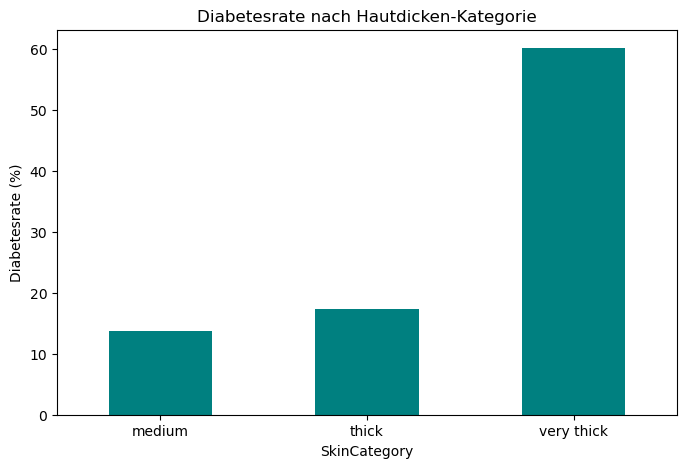

In [60]:
Outcome_by_SkinCategory= df.groupby("SkinCategory", observed=True)["Outcome"].mean() * 100

Outcome_by_SkinCategory.plot(
    kind="bar",
    color="teal",
    figsize=(8, 5),
    ylabel="Diabetesrate (%)",
    title="Diabetesrate nach Hautdicken-Kategorie",
    legend=False
)

plt.xticks(rotation=0)
plt.show()


In [61]:
#Mit zunehmender Hautdicke steigt das Diabetesrisiko signifikant an.

In [62]:
#MODELLIERUNG 

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Pregnancies               768 non-null    float64 
 1   Glucose                   768 non-null    float64 
 2   BloodPressure             768 non-null    float64 
 3   SkinThickness             768 non-null    float64 
 4   Insulin                   768 non-null    float64 
 5   BMI                       768 non-null    float64 
 6   DiabetesPedigreeFunction  768 non-null    float64 
 7   Age                       768 non-null    int64   
 8   Outcome                   768 non-null    int64   
 9   AgeGroup                  768 non-null    category
 10  BMICategory               768 non-null    category
 11  GlucoseCategory           768 non-null    category
 12  PregnancyCategory         768 non-null    category
 13  InsulinCategory           768 non-null    category

In [64]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Kopie des Original-Datensatzes erstellen
df_encoded = df.copy()

# Zielvariable ausschließen
target_col = "Outcome"

# Alle kategorialen Spalten auswählen (Datentyp "category")
cat_cols = df_encoded.select_dtypes(include="category").columns.tolist()

# Zielvariable ausschließen
cat_cols = [col for col in cat_cols if col != target_col]

# Kategoriale Spalten in binäre und nicht-binäre aufteilen
binary_cols = [col for col in cat_cols if df_encoded[col].nunique() == 2]
one_hot_cols = [col for col in cat_cols if df_encoded[col].nunique() > 2]

#Label-Encoding für binäre Variablen
le = LabelEncoder()
for col in binary_cols:
    df_encoded[col] = le.fit_transform(df_encoded[col])

# One-Hot-Encoding für Variablen mit mehr als zwei Kategorien
ohe = OneHotEncoder(drop='first', sparse_output=False)
encoded_array = ohe.fit_transform(df_encoded[one_hot_cols])
encoded_cols = ohe.get_feature_names_out(one_hot_cols)

# DataFrame mit den One-Hot-kodierten Spalten erstellen und zusammenfügen
encoded_df = pd.DataFrame(encoded_array, columns=encoded_cols, index=df_encoded.index)
df_encoded.drop(columns=one_hot_cols, inplace=True)
df_encoded = pd.concat([df_encoded, encoded_df], axis=1)


In [65]:
df_encoded.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,AgeGroup_30s,AgeGroup_40s,AgeGroup_50s,AgeGroup_60+,BMICategory_Obese,BMICategory_Overweight,BMICategory_Underweight,GlucoseCategory_normal,GlucoseCategory_prediabetes,PregnancyCategory_normal,PregnancyCategory_unpregnant,PregnancyCategory_very high,InsulinCategory_low,InsulinCategory_normal,BPCategory_high-normal,BPCategory_low,BPCategory_normal,SkinCategory_thick,SkinCategory_very thick
0,6.000,148.000,72.000,35.000,206.846,33.600,0.627,50,1,0.000,1.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,1.000
1,1.000,85.000,66.000,29.000,130.288,26.600,0.351,31,0,1.000,0.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,1.000,0.000
2,8.000,183.000,64.000,33.000,206.846,23.300,0.672,32,1,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,1.000
3,1.000,89.000,66.000,23.000,94.000,28.100,0.167,21,0,0.000,0.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,1.000,0.000
4,0.000,137.000,40.000,35.000,168.000,43.100,1.200,33,1,1.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000


In [66]:
from sklearn.preprocessing import StandardScaler

# Zielvariable ausschließen
target_col = "Outcome"

# Nur numerische Spalten auswählen (float & int), kategorische ausschließen
numeric_cols = df_encoded.select_dtypes(include=["float64", "int64"]).columns.tolist()
numeric_cols = [col for col in numeric_cols if col != target_col]

# StandardScaler-Objekt erstellen
scaler = StandardScaler()

# Numerische Spalten skalieren
df_encoded[numeric_cols] = scaler.fit_transform(df_encoded[numeric_cols])

In [67]:
df_encoded.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,AgeGroup_30s,AgeGroup_40s,AgeGroup_50s,AgeGroup_60+,BMICategory_Obese,BMICategory_Overweight,BMICategory_Underweight,GlucoseCategory_normal,GlucoseCategory_prediabetes,PregnancyCategory_normal,PregnancyCategory_unpregnant,PregnancyCategory_very high,InsulinCategory_low,InsulinCategory_normal,BPCategory_high-normal,BPCategory_low,BPCategory_normal,SkinCategory_thick,SkinCategory_very thick
0,0.647,0.864,-0.034,0.743,0.821,0.182,0.589,1.426,1,-0.507,2.408,-0.275,-0.191,0.768,-0.551,-0.072,-0.577,-0.751,-1.152,-0.411,-0.215,-0.063,-1.347,-0.482,-0.355,0.781,-0.841,1.164
1,-0.849,-1.205,-0.547,-0.009,-0.315,-0.868,-0.378,-0.191,0,1.973,-0.415,-0.275,-0.191,-1.302,1.814,-0.072,1.732,-0.751,0.868,-0.411,-0.215,-0.063,0.743,-0.482,-0.355,0.781,1.190,-0.859
2,1.246,2.014,-0.718,0.492,0.821,-1.363,0.747,-0.106,1,1.973,-0.415,-0.275,-0.191,-1.302,-0.551,-0.072,-0.577,-0.751,-1.152,-0.411,-0.215,-0.063,-1.347,-0.482,-0.355,0.781,-0.841,1.164
3,-0.849,-1.074,-0.547,-0.760,-0.853,-0.643,-1.023,-1.042,0,-0.507,-0.415,-0.275,-0.191,-1.302,1.814,-0.072,1.732,-0.751,0.868,-0.411,-0.215,-0.063,0.743,-0.482,-0.355,0.781,1.190,-0.859
4,-1.148,0.503,-2.769,0.743,0.244,1.607,2.597,-0.020,1,1.973,-0.415,-0.275,-0.191,0.768,-0.551,-0.072,-0.577,-0.751,-1.152,2.433,-0.215,-0.063,-1.347,-0.482,2.816,-1.280,-0.841,1.164


In [69]:
#Random Forest Modellierung zur Diabetes-Vorhersage
# Notwendige Bibliotheken importieren
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score

# Zielvariable (Outcome) und Merkmale (Features) definieren
y = df_encoded["Outcome"]
X = df_encoded.drop("Outcome", axis=1)

# Trainings- und Testdaten aufteilen (70 % Training, 30 % Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=17)

# Random Forest Modell erstellen und trainieren
rf_model = RandomForestClassifier(random_state=46)
rf_model.fit(X_train, y_train)

# Vorhersage auf dem Testdatensatz
y_pred = rf_model.predict(X_test)

# Modellbewertung
print(f"Genauigkeit (Accuracy): {round(accuracy_score(y_test, y_pred), 2)}")
print(f"Trefferquote (Recall): {round(recall_score(y_test, y_pred), 2)}")
print(f"Präzision (Precision): {round(precision_score(y_test, y_pred), 2)}")
print(f"F1-Score: {round(f1_score(y_test, y_pred), 2)}")
print(f"AUC: {round(roc_auc_score(y_test, y_pred), 2)}")


Genauigkeit (Accuracy): 0.87
Trefferquote (Recall): 0.78
Präzision (Precision): 0.85
F1-Score: 0.81
AUC: 0.85


In [70]:
##XGBoost Modellierung zur Diabetes-Vorhersage
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score
from sklearn.model_selection import train_test_split

# Zielvariable (abhängige Variable)
y = df_encoded["Outcome"]

# Merkmale (unabhängige Variablen)
X = df_encoded.drop("Outcome", axis=1)

# Aufteilen in Trainings- und Testdaten
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=17)

# XGBoost-Modell erstellen und trainieren (ohne use_label_encoder)
xgb_model = XGBClassifier(random_state=46, eval_metric='logloss')
xgb_model.fit(X_train, y_train)

# Vorhersage auf Testdaten
y_pred = xgb_model.predict(X_test)
y_proba = xgb_model.predict_proba(X_test)[:, 1]

# Modellbewertung
print(f"Genauigkeit (Accuracy): {round(accuracy_score(y_test, y_pred), 2)}")
print(f"Trefferquote (Recall): {round(recall_score(y_test, y_pred), 2)}")
print(f"Präzision (Precision): {round(precision_score(y_test, y_pred), 2)}")
print(f"F1-Score: {round(f1_score(y_test, y_pred), 2)}")
print(f"AUC: {round(roc_auc_score(y_test, y_proba), 2)}")


Genauigkeit (Accuracy): 0.87
Trefferquote (Recall): 0.75
Präzision (Precision): 0.85
F1-Score: 0.8
AUC: 0.94


In [71]:
# K-Nearest Neighbors (KNN) Modellierung zur Diabetes-Vorhersage
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score
from sklearn.model_selection import train_test_split

# Zielvariable: Outcome (Diabetes: 1 = Ja, 0 = Nein)
y = df_encoded["Outcome"]

# Merkmale (alle anderen Spalten außer Zielvariable)
X = df_encoded.drop("Outcome", axis=1)

# Aufteilen in Trainings- und Testdaten
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=17)

# KNN-Modell erstellen (Standard: k=5)
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Vorhersagen auf Testdaten machen
y_pred = knn_model.predict(X_test)

# Modellbewertung
print(f"Genauigkeit (Accuracy): {accuracy_score(y_test, y_pred):.2f}")
print(f"Trefferquote (Recall): {recall_score(y_test, y_pred):.2f}")
print(f"Präzision (Precision): {precision_score(y_test, y_pred):.2f}")
print(f"F1-Score: {f1_score(y_test, y_pred):.2f}")

# AUC mit Wahrscheinlichkeiten berechnen
y_proba = knn_model.predict_proba(X_test)[:, 1]
print(f"AUC: {roc_auc_score(y_test, y_proba):.2f}")


Genauigkeit (Accuracy): 0.83
Trefferquote (Recall): 0.68
Präzision (Precision): 0.81
F1-Score: 0.74
AUC: 0.85


In [72]:
# CatBoost Modellierung zur Diabetes-Vorhersage
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score
from sklearn.model_selection import train_test_split

# Zielvariable: Diabetes vorhanden (1) oder nicht (0)
y = df_encoded["Outcome"]

# Merkmale (unabhängige Variablen)
X = df_encoded.drop("Outcome", axis=1)

# Aufteilen in Trainings- und Testdaten
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=17)

# CatBoost-Modell erstellen (verbose=False unterdrückt Ausgaben)
catboost_model = CatBoostClassifier(verbose=False, random_state=46)
catboost_model.fit(X_train, y_train)

# Vorhersagen auf Testdaten machen
y_pred = catboost_model.predict(X_test)

# Modellbewertung
print(f"Genauigkeit (Accuracy): {accuracy_score(y_test, y_pred):.2f}")
print(f"Trefferquote (Recall): {recall_score(y_test, y_pred):.2f}")
print(f"Präzision (Precision): {precision_score(y_test, y_pred):.2f}")
print(f"F1-Score: {f1_score(y_test, y_pred):.2f}")

# AUC-Wert berechnen
y_proba = catboost_model.predict_proba(X_test)[:, 1]
print(f"AUC: {roc_auc_score(y_test, y_proba):.2f}")


Genauigkeit (Accuracy): 0.87
Trefferquote (Recall): 0.75
Präzision (Precision): 0.86
F1-Score: 0.80
AUC: 0.94


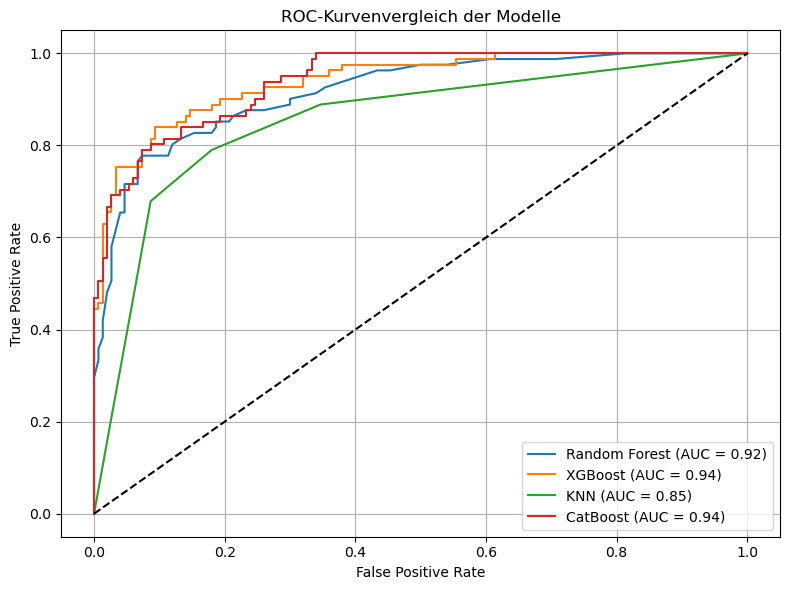

In [73]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Modellvorhersagewahrscheinlichkeiten erhalten
y_scores_rf = rf_model.predict_proba(X_test)[:, 1]
y_scores_xgb = xgb_model.predict_proba(X_test)[:, 1]
y_scores_knn = knn_model.predict_proba(X_test)[:, 1]
y_scores_cat = catboost_model.predict_proba(X_test)[:, 1]

# Berechnung der ROC-Werte
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_scores_rf)
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_scores_xgb)
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_scores_knn)
fpr_cat, tpr_cat, _ = roc_curve(y_test, y_scores_cat)

# Berechnung der AUC-Werte
auc_rf = roc_auc_score(y_test, y_scores_rf)
auc_xgb = roc_auc_score(y_test, y_scores_xgb)
auc_knn = roc_auc_score(y_test, y_scores_knn)
auc_cat = roc_auc_score(y_test, y_scores_cat)

# Erstellung der Grafiken
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_rf:.2f})')
plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost (AUC = {auc_xgb:.2f})')
plt.plot(fpr_knn, tpr_knn, label=f'KNN (AUC = {auc_knn:.2f})')
plt.plot(fpr_cat, tpr_cat, label=f'CatBoost (AUC = {auc_cat:.2f})')


plt.plot([0,1], [0,1], 'k--')  # 45 Grad Diagonale
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-Kurvenvergleich der Modelle')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()


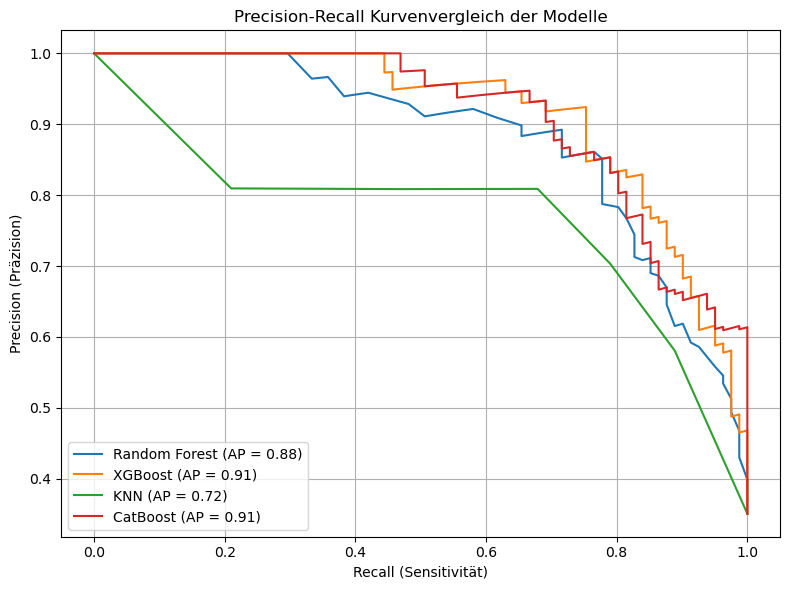

In [74]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, average_precision_score

# Wahrscheinlichkeiten der Modelle vorhersagen
y_scores_rf = rf_model.predict_proba(X_test)[:, 1]
y_scores_xgb = xgb_model.predict_proba(X_test)[:, 1]
y_scores_knn = knn_model.predict_proba(X_test)[:, 1]
y_scores_cat = catboost_model.predict_proba(X_test)[:, 1]

# Precision- und Recall-Werte berechnen
precision_rf, recall_rf, _ = precision_recall_curve(y_test, y_scores_rf)
precision_xgb, recall_xgb, _ = precision_recall_curve(y_test, y_scores_xgb)
precision_knn, recall_knn, _ = precision_recall_curve(y_test, y_scores_knn)
precision_cat, recall_cat, _ = precision_recall_curve(y_test, y_scores_cat)

# Average Precision (AP) berechnen
ap_rf = average_precision_score(y_test, y_scores_rf)
ap_xgb = average_precision_score(y_test, y_scores_xgb)
ap_knn = average_precision_score(y_test, y_scores_knn)
ap_cat = average_precision_score(y_test, y_scores_cat)

# Erstellung der Grafiken
plt.figure(figsize=(8, 6))
plt.plot(recall_rf, precision_rf, label=f'Random Forest (AP = {ap_rf:.2f})')
plt.plot(recall_xgb, precision_xgb, label=f'XGBoost (AP = {ap_xgb:.2f})')
plt.plot(recall_knn, precision_knn, label=f'KNN (AP = {ap_knn:.2f})')
plt.plot(recall_cat, precision_cat, label=f'CatBoost (AP = {ap_cat:.2f})')

plt.xlabel('Recall (Sensitivität)')
plt.ylabel('Precision (Präzision)')
plt.title('Precision-Recall Kurvenvergleich der Modelle')
plt.legend(loc='lower left')
plt.grid(True)
plt.tight_layout()
plt.show()
